# Parte 4

In [1]:
import keras
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

y_train = keras.utils.to_categorical(y_train, num_classes=100)
y_test = keras.utils.to_categorical(y_test, num_classes=100)
x_train = x_train/255.0
x_test = x_test/255.0

Using TensorFlow backend.


In [14]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def retornar(modelo, x_train, y_train, x_test, y_test, epochs, batch_size):
    loss_train = list(); loss_test = list(); acc_train = list(); acc_test = list()
    for i in range(epochs):
        modelo.fit(x_train, y_train, batch_size=batch_size, epochs=1, verbose=1, validation_data=(x_test, y_test))
        aux_train = modelo.evaluate(x_train, y_train, verbose=0)
        aux_test = modelo.evaluate(x_test, y_test, verbose = 0)
        loss_train.append(aux_train[0]); acc_train.append(aux_train[1])
        loss_test.append(aux_test[0]); acc_test.append(aux_test[1])
    return(loss_train, loss_test, acc_train, acc_test)

def graficar(modelo, x_train, y_train, x_test, y_test, epochs, batch_size):
    loss_train, loss_test, acc_train, acc_test = retornar(modelo, x_train, y_train, x_test, y_test, epochs, batch_size)
    epl = list(range(1, epochs+1))
    fig = plt.figure(figsize = (12,4))
    plt.plot(epl, loss_train, '-', label='loss train')
    plt.plot(epl, loss_test, '-', label='loss test')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs epoch')
    plt.show()
    fig = plt.figure(figsize = (12,4))
    plt.plot(epl, acc_train, '-', label='acc train')
    plt.plot(epl, acc_test, '-', label='acc test')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs epoch')
    plt.show()
            
def subplot_loss(epochs, ns, distribucion, nombres, subs):
    epl = list(1, range(epochs+1))
    fig = plt.figure(figsize=(18,8))
    for i in range(ns):
        aux = subs[i]
        plt.subplot(distribucion+i)
        plt.title(nombres[i])
        plt.plot(epl, aux[0], '-g')
        plt.plot(epl, aux[1], '-r')
    blue_line = mlines.Line2D([], [], color='g')
    reds_line = mlines.Line2D([], [], color='r')
    fig.legend((blue_line, reds_line), ('train', 'test'), 'upper right')
    fig.suptitle('Loss vs epoch', fontsize=16)
    plt.show()
    
def subplot_acc(epochs, ns, distribucion, nombres, subs):
    epl = list(1, range(epochs+1))
    fig = plt.figure(figsize=(18,8))
    for i in range(ns):
        aux = subs[i]
        plt.subplot(distribucion+i)
        plt.title(nombres[i])
        plt.plot(epl, aux[2], '-y')
        plt.plot(epl, aux[3], '-b')
    blue_line = mlines.Line2D([], [], color='y')
    reds_line = mlines.Line2D([], [], color='b')
    fig.legend((blue_line, reds_line), ('train', 'test'), 'upper right')
    fig.suptitle('Accuracy vs epoch', fontsize=16)
    plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
#model.summary()

optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
#model.fit(x_train, y_train, batch_size=128,epochs=15,verbose=1, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 2s 250us/step

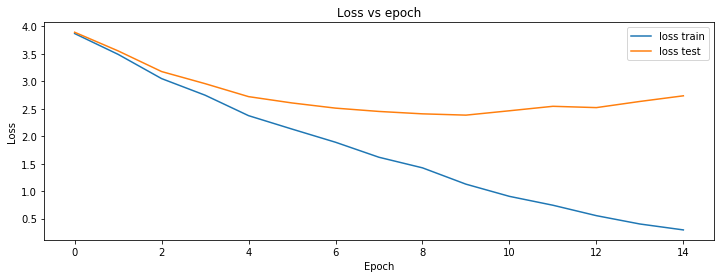

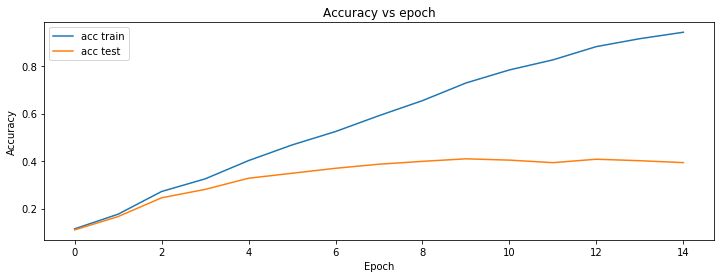

In [101]:
graficar(model, x_train, y_train, x_test, y_test, 15, 128)

a) Se presentan dos gráficos en los que se traza el comportamiento de la función de perdida y la exactitud en función de la cantidad de epochs. Se puede ver que el comportamiento del conjunto de test es mucho peor que el de entrenamiento. En la representación del accuracy se puede ver como para el conjunto de entreamiento se llega a un valor del 100%, mientras que el conjunto de pruebas se estanca e incluso comienza a bajar. Lo mismo se puede ver en la representación de la función de perdida y es que mientras los valores para el conjunto de entrenamiento son esctrictamente decrecientes se puede ver como en el conjunto de pruebas se empiezan a obtener peores resultados luego de cierto número de epochs. Lo observado se condice con una red que presenta sobreajuste, y es que a medida que se fue entrenando se acostumbro a los datos de entrenamiento lo que le permite predecirlos con gran exactitud, pero le es difícil generalizar y hacer buenas predicciones para datos nuevos.

In [103]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
model1.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model1.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dropout(0.25))
model1.add(Dense(1024,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.01,momentum=0.9)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])

model2 = Sequential()
model2.add(Conv2D(32, (3, 3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
model2.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model2.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(1024,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.01,momentum=0.9)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])

model3 = Sequential()
model3.add(Conv2D(32, (3, 3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
model3.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model3.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(1024,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.01,momentum=0.9)
model3.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])

model4 = Sequential()
model4.add(Conv2D(32, (3, 3),padding='same',input_shape=x_train.shape[1:],activation='relu'))
model2.add(Dropout(0.25))
model4.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model4.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())
model4.add(Dense(1024,activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.01,momentum=0.9)
model4.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])

In [107]:
sub1 = retornar(model1, x_train, y_train, x_test, y_test, 15, 128)
sub2 = retornar(model1, x_train, y_train, x_test, y_test, 15, 128)
sub3 = retornar(model1, x_train, y_train, x_test, y_test, 15, 128)
sub4 = retornar(model1, x_train, y_train, x_test, y_test, 15, 128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 3s 280us/step

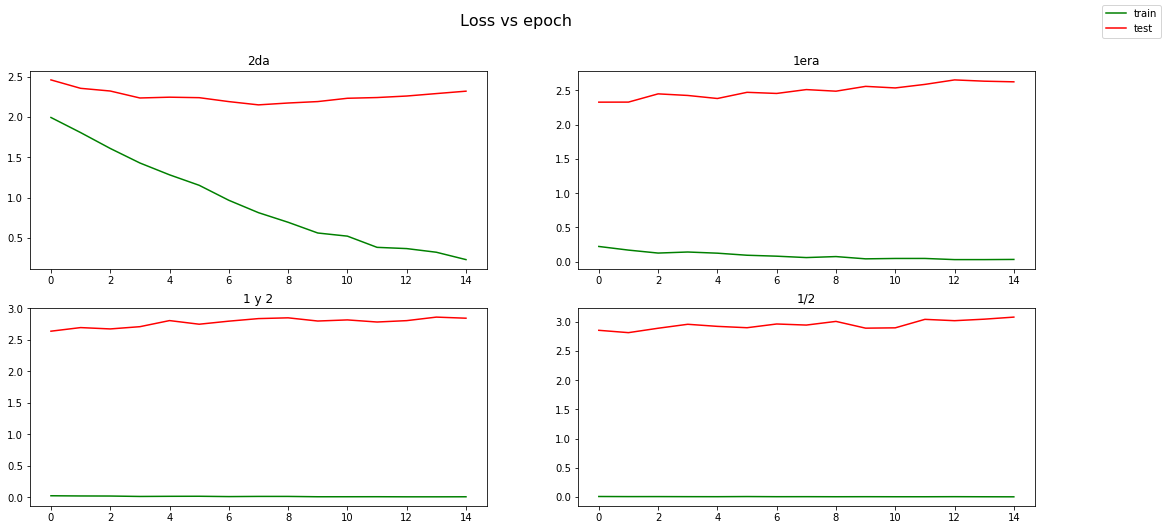

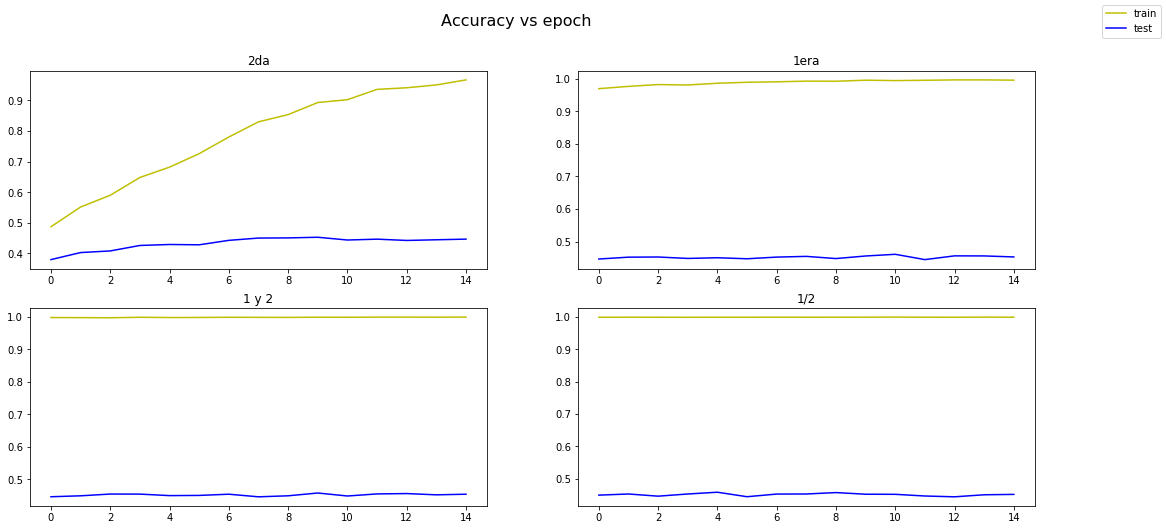

In [112]:
subplot_loss(15, 4, 221, ['2da', '1era', '1 y 2', '1/2'], [sub1, sub2, sub3, sub4])
subplot_acc(15, 4, 221, ['2da', '1era', '1 y 2', '1/2'], [sub1, sub2, sub3, sub4])

b) Se aplica dropout en distintas partes del modelo, para varios de ellos se obtiene un peor resultado en que el overfitting es inmediato. Donde tiene más sentido aplicar el dropout es después de la capa de maxpooling, ya que es aquí donde se presentan el mayor número de parámetros libres. Tiene mayor peso hacerlo aquí ya que en las capas convolucionales se reduce la cantidad de parámetros con los que se trabaja. Destacar que el resultado para el set de pruebas no mejoro en este paso.

In [109]:
import pickle
#with open('T1.P4.b.pickle', 'wb') as handle:
    #pickle.dump(list([sub1, sub2, sub3, sub4]), handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('x_4.pickle', 'rb') as handle:
    x_train, x_val, x_test = pickle.load(handle)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 9)         252       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 3)         246       
Total params: 498
Trainable params: 498
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 9)         252       
_________________________________________________________________
conv2d_23 (C

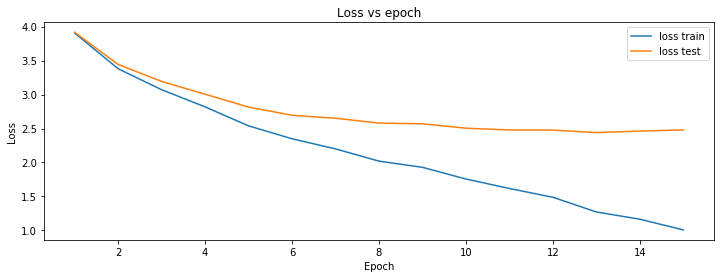

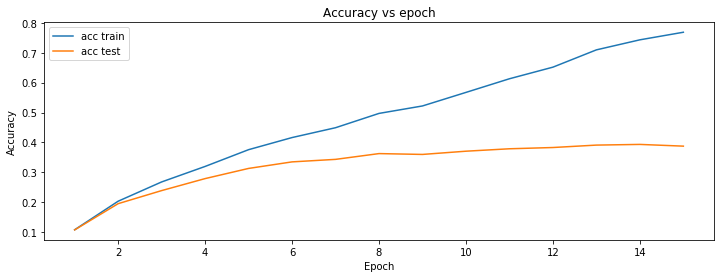

In [10]:
from keras.layers import Input
from keras.models import Model

hidden_layer1 = 9
hidden_layer2 = 3
loss_ = 'categorical_crossentropy'
activation_1 = 'relu'
decoder_activation='softmax'
activation_2 = 'relu'
decoder_activation2 = 'softmax'
###BUILD AUTOENCODER1
input_img = Input(shape=x_train.shape[1:])
encoded1 = Conv2D(hidden_layer1, (3, 3),activation=activation_1,padding='same')(input_img)
decoded1 = Conv2D(3, (3, 3), activation=decoder_activation, padding='same')(encoded1)
autoencoder1 = Model(input_img, decoded1)
autoencoder1.compile(optimizer='adam', loss=loss_)
autoencoder1.summary()
autoencoder1.fit(x_train, x_train, epochs=15, batch_size=128, verbose=0, validation_data=(x_test, x_test))
autoencoder1.save('autoencoder_layer1.h5')
###BUILD AUTOENCODER2
encoded1 = autoencoder1.layers[1](autoencoder1.input)
#AUTOENCODER2
encoded2 = Conv2D(hidden_layer2,(3, 3), activation=activation_2, padding='same')(encoded1) 
decoded2 = Conv2D(hidden_layer1,(3, 3), activation=decoder_activation2,padding='same')(encoded2) 
#finish AUTOENCODER2
decoded1 = autoencoder1.layers[-1](decoded2)
autoencoder2 = Model(autoencoder1.input, decoded1) #all model
#autoencoder1 set fixed
autoencoder2.layers[1].trainable=False
autoencoder2.layers[-1].trainable=False
autoencoder2.compile(optimizer='adam', loss=loss_)
autoencoder2.summary()
autoencoder2.fit(x_train, x_train, epochs=10, batch_size=128, verbose=0, validation_data=(x_test, x_test))
autoencoder2.save('autoencoder_layer2.h5')
#FINE TUNNING
model = Sequential()
model.add(Conv2D(hidden_layer1,(3, 3),padding='same',activation=activation_1,input_shape=x_train.shape[1:]))
model.layers[-1].set_weights(autoencoder1.layers[1].get_weights())
model.add(Conv2D(hidden_layer2, (3, 3),padding='same',activation=activation_2))
model.layers[-1].set_weights(autoencoder2.layers[2].get_weights())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
#model.fit(x_train, y_train, batch_size=128,epochs=15,verbose=1, validation_data=(x_test, y_test))
graficar(model, x_train, y_train, x_test, y_test, 15, 128)

c) Al utilizar autoencoders para transfer learning se llega a que, con el mismo modelo planteado anteriormente nos e consiguen mejoras sobre el mismo. Incluso se puede decir que los resultados empeoran.

In [12]:
from keras.applications import VGG16
#LOAD PRETRAINED MODEL 
input_tensor=Input(shape=x_train.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor )
features_train = modelVGG.predict(x_train)
features_test = modelVGG.predict(x_test)
modelVGG.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 4s 79us/step - loss: 3.9540 - acc: 0.1115 - val_loss: 3.3944 - val_acc: 0.2071

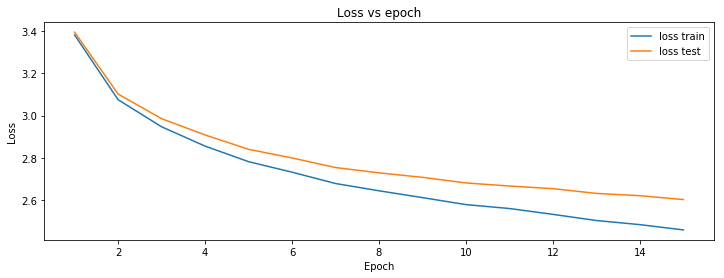

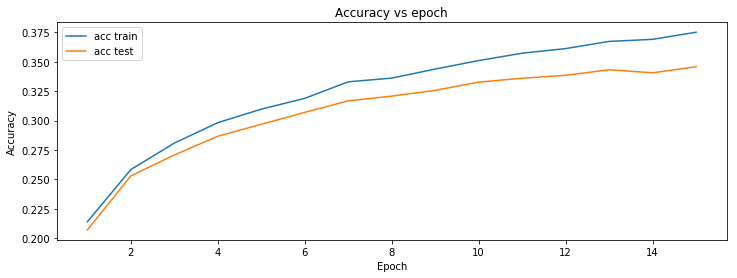

In [22]:
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
graficar(model, features_train, y_train, features_test, y_test, 15, 128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 4s 79us/step - loss: 4.1995 - acc: 0.0797 - val_loss: 3.6951 - val_acc: 0.1758

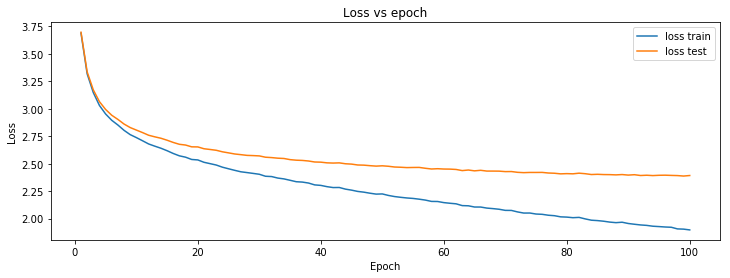

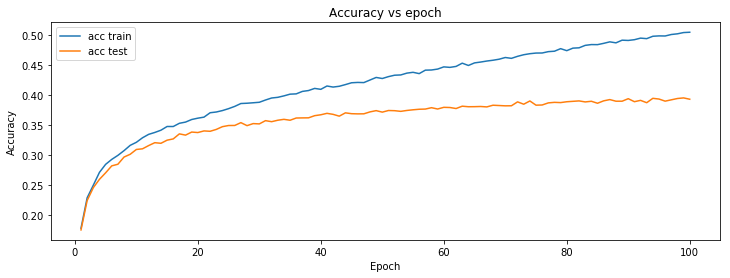

In [19]:
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.005,momentum=0.9)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
graficar(model, features_train, y_train, features_test, y_test, 100, 128)

d) Lo mismo planteado anteriormente sucede al hacer transfer learning mediante el modelo pre entrenado VGG16, y es que no se consigue una mejora por sobre las pruebas anteriores. Con tal de buscar un mejor resultado se cambian los parámetros para el optimizador utilizando una tasa de aprendizaje menor y se entrena por un número mayor de epochs, a pesar de esto la red no logra mejores resultados para el set de pruebas y luego de los 100 epochs se estanca en una exactitud de un 40% para el set de pruebas.

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 99us/step

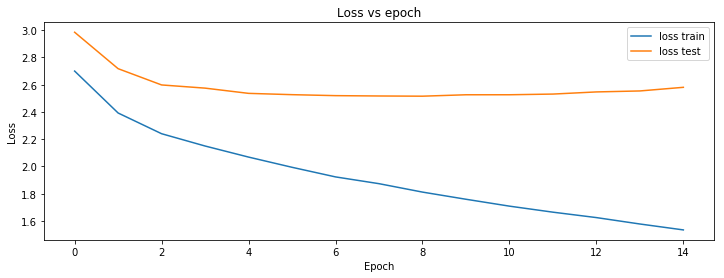

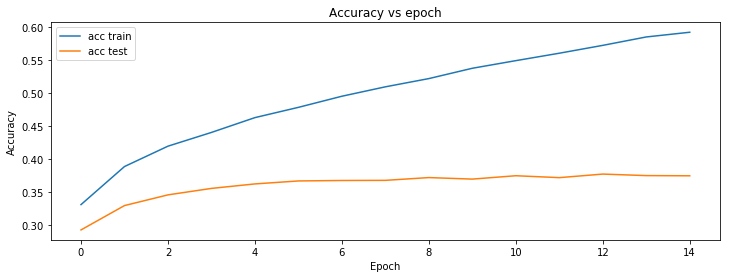

In [19]:
from keras.layers import BatchNormalization
model = Sequential()
model.add(Flatten(input_shape=features_train.shape[1:]))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
graficar(model, features_train, y_train, features_test, y_test, 15, 128)

e) Con batch normalization se obtienen mejores resultados en el sentido de que se llega a una convergencia más rápido que sin batch normalization, y es que el conocimiento desde el cual se busca transferir a la red puede ser diferente al que se está buscando aprender. Por ejemplo puede que cierta categoría, digamos autos, hayan sido todos de color un color A en el entrenamiento de VGG16, y con los que se trabaje ahora tengan una gama de colores de de B a Z, la batch normalization permite que la distribución sea equiparable entre ambos modelos permitiendole hacer un mejor trabajo en transfer learning.

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 33s 660us/step - loss: 3.5600 - acc: 0.2057 - val_loss: 6.3648 - val_acc: 0.1212

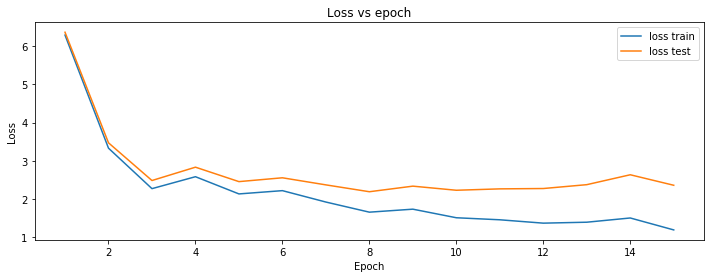

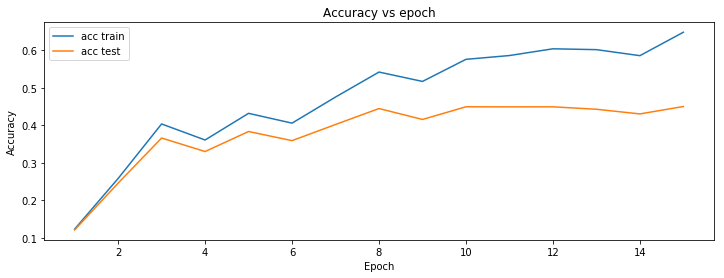

In [23]:
import numpy as np
from keras.applications import VGG16
from keras.layers import BatchNormalization
from keras.layers import Input
#LOAD PRETRAINED MODEL 
input_tensor=Input(shape=x_train.shape[1:])
modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor )
salida_vgg = modelVGG.get_layer('block4_pool').output_shape
model = Sequential()
model.add(Conv2D(512,(3, 3),input_shape=salida_vgg[1:],activation='relu',padding='same'))
model.add(Conv2D(512,(3, 3),activation='relu',padding='same'))
model.add(Conv2D(512,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2),strides=(2,2)))    
##dense section
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
#delete last 4 layers of VGG16 and transfer the weight to new model
modelVGG.layers.pop() #delete last maxpooling
for i in np.arange(2,-1,-1):
    last = modelVGG.layers.pop() #delete convolutional layers
    model.layers[i].set_weights(last.get_weights())
from keras.models import Model
crop_modelVGG = Model(inputs=modelVGG.input, outputs=modelVGG.layers[-1].output)
features_train = crop_modelVGG.predict(x_train)
features_test = crop_modelVGG.predict(x_test)
#train it
optimizer_ = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(features_train,y_train,epochs=15,batch_size=128,verbose=1,validation_data=(features_test,y_test))
graficar(model, features_train, y_train, features_test, y_test, 15, 128)

f) Entrenar la última convolución del modelo pre entrenado permite obtener mejores resultados para el set de pruebas que los modelos que se usaron anteriormente, aunque no es una gran mejora respecto a los anteriores modelos. Que el entrenar la última capa permita mejores resultados tiene sentido ya que el modelo VGG16 fue entrenado con las imagenes de imagenet y aquí se trabaja con el set cifar-100.